In [90]:
#import necessary libraries
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [91]:
#read csv file
dataset=pd.read_csv(r"C:\Users\HP PC\Downloads\diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [92]:
#create output labels
Y=dataset["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [93]:
#create input data
X=dataset.drop(columns=["Outcome"],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [94]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.218)


In [96]:
x_train

array([[ 1.23388019, -0.34096773,  0.35643175, ..., -0.53211885,
        -0.70935431,  2.10669743],
       [-0.54791859, -0.40356202, -0.26394125, ..., -0.15136112,
        -0.94794368, -1.04154944],
       [ 0.04601433, -0.77912776, -0.67752325, ..., -1.42055357,
        -0.39828208, -0.61611067],
       ...,
       [ 1.23388019,  0.1597866 ,  0.25303625, ..., -0.77326542,
        -0.93586321,  0.49003012],
       [-0.84488505, -1.37377352, -0.67752325, ...,  0.165937  ,
         2.35304603, -0.78628618],
       [ 1.23388019, -0.68523633,  0.77001375, ...,  0.43246741,
        -0.25331639,  1.4259954 ]])

In [97]:
x_train.shape

(600, 8)

In [98]:
#use sklearn imported logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7058823529411765
Recall: 0.631578947368421
F1 Score: 0.6666666666666666


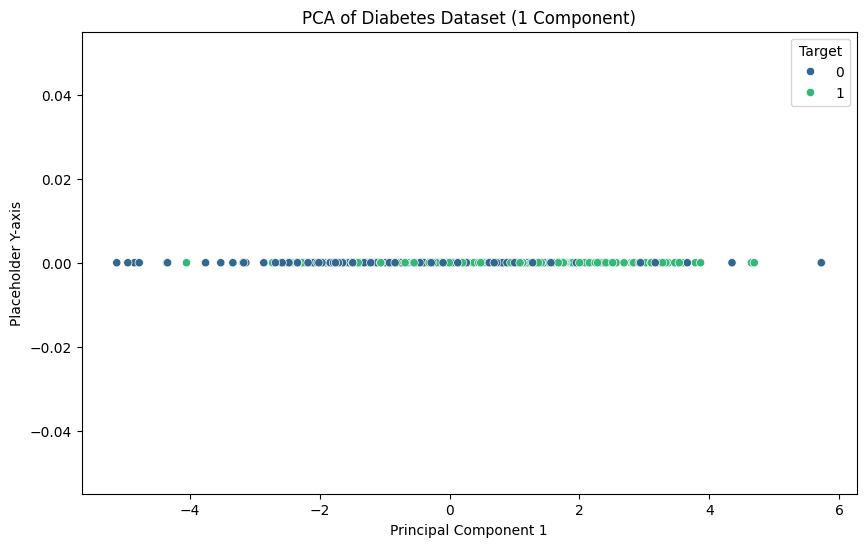

In [103]:
from sklearn.decomposition import PCA
# Step 1: Apply PCA to reduce to 1 component
pca = PCA(n_components=2)  # Only 1 component
X_pca = pca.fit_transform(X)

# Step 2: Create a DataFrame with the single PCA component and the target variable
df_pca = pd.DataFrame(data=X_pca, columns=['PC1'])
df_pca['target'] = Y

# Step 3: Plot PCA results (this is now a 1D plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y=[0] * len(df_pca), hue='target', data=df_pca, palette='viridis')
plt.title('PCA of Diabetes Dataset (1 Component)')
plt.xlabel('Principal Component 1')
plt.ylabel('Placeholder Y-axis')  # The y-axis is just for display since this is 1D
plt.legend(title='Target')
plt.show()

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Initialize list to store probabilities for each feature
feature_probabilities = []

# Train logistic regression on each feature individually and get probability for each
for i in range(X.shape[1]):
    log_reg = LogisticRegression()
    log_reg.fit(x_train[:, i].reshape(-1, 1), y_train)
    prob = log_reg.predict_proba(x_train[:, i].reshape(-1, 1))[:, 1]  # Get probabilities of positive class
    feature_probabilities.append(prob)

# Convert the list of probabilities to a matrix (rows: samples, columns: features)
proba_train_matrix = np.array(feature_probabilities).T
pc1_loadings = [0.128432, 0.393083, 0.360003, 0.439824, 0.435026, 0.451941, 0.270611, 0.198027]
pc2_loadings = [0.593786, 0.174029, 0.183892, -0.331965, -0.250781, -0.100960, -0.122069, 0.620589]

# Calculate combined score using PCA loadings as weights on the probabilities
combined_score = np.dot(proba_train_matrix, pc1_loadings) + np.dot(proba_train_matrix, pc2_loadings)

# Step 3: Set a threshold for classification
threshold = 1.32#after hit and trial
predictions = (combined_score > threshold).astype(int)

accuracy = accuracy_score(y_train, predictions)

# Create confusion matrix
conf_matrix = confusion_matrix(y_train, predictions)

print(f"Accuracy with PCA-weighted probabilities: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy with PCA-weighted probabilities: 0.7333
Confusion Matrix:
[[319  70]
 [ 90 121]]


In [113]:
feature_probabilities_test = []

for i in range(x_test.shape[1]):
    log_reg = LogisticRegression()
    log_reg.fit(x_train[:, i].reshape(-1, 1), y_train)
    prob_test = log_reg.predict_proba(x_test[:, i].reshape(-1, 1))[:, 1]  # Get probabilities of positive class
    feature_probabilities_test.append(prob_test)

# Convert the list of probabilities to a matrix (rows: samples, columns: features)
proba_test_matrix = np.array(feature_probabilities_test).T

# Step 2: Calculate combined score using PCA loadings for the test set
combined_score_test = np.dot(proba_test_matrix, pc1_loadings) + np.dot(proba_test_matrix, pc2_loadings)

# Step 3: Use the same threshold from training (you set 1.25)
threshold = 1.24
predictions_test = (combined_score_test > threshold).astype(int)

# Step 4: Evaluate the model on test set
accuracy_test = accuracy_score(y_test, predictions_test)
conf_matrix_test = confusion_matrix(y_test, predictions_test)

# Print results
print(f"Accuracy with PCA-weighted probabilities (Test Set): {accuracy_test:.4f}")
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

Accuracy with PCA-weighted probabilities (Test Set): 0.7619
Confusion Matrix (Test Set):
[[84 27]
 [13 44]]


In [116]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have the dataset loaded as X and y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Hyperparameters found:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

# Predict on test data
y_pred = best_xgb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")




Fitting 5 folds for each of 972 candidates, totalling 4860 fits


C:\Users\HP PC\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:59:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 2.0, 'subsample': 1.0}
Accuracy: 75.32%
